In [27]:
#InteractionsFileCaptureC='/srv/scratch/mtaranov/CaptureC_ChicagoCalls/CaptureC_SC_bait-bait.bed.gz'
#run on kali
InteractionsFileCaptureC='/users/mtaranov/CaptureC_files/CaptureC_SC_bait-bait.bed.gz'

#InteractionsFileHiC100='/srv/gsfs0/projects/kundaje/users/mtaranov/projects/dynamic3D/ContactsAfterIC/P-P_from_HiC/output/PP_SC_RE100.bed.gz'
#InteractionsFileHiC20='/srv/gsfs0/projects/kundaje/users/mtaranov/projects/dynamic3D/ContactsAfterIC/P-P_from_HiC/output/PP_SC_RE20.bed.gz'
#InteractionsFileHiC5='/srv/gsfs0/projects/kundaje/users/mtaranov/projects/dynamic3D/ContactsAfterIC/P-P_from_HiC/output/PP_SC_RE5.bed.gz'

#PromoterFile='/srv/scratch/mtaranov/HindIII/PromoterCapture_Digest_Human_HindIII_baits_ID.bed'
#run on kali
PromoterFile='/users/mtaranov/CaptureC_files/PromoterCapture_Digest_Human_HindIII_baits_ID.bed'
motifs_top3='/users/mtaranov/sequence_to_motif/out_3_0.0001/mat.npy'
motifs_top3_pos='/users/mtaranov/sequence_to_motif/out_3_0.0001/pos.npy'
PROJDIR='/users/mtaranov/NN_thres5max_datasets/'
DATAJDIR='/users/mtaranov/NN_thres5max_datasets/dist_matched/w_motifs/'

In [28]:
#features_path='/srv/scratch/mtaranov/peaks_at_promoters/output_thres5_max/'
#run on kali
features_path='/users/mtaranov/CaptureC_files/output_thres5_max/'
atac=features_path+'atac'
#TFs
ctcf=features_path+'CTCF'
pol3=features_path+'PolII'
TP63=features_path+'TP63'
LSD1=features_path+'LSD1'
#histone
H3K27ac=features_path+'H3K27ac'
H3K27me3=features_path+'H3K27me3'
H3K4me1=features_path+'H3K4me1'
H3K4me3=features_path+'H3K4me3'
H3K9ac=features_path+'H3K9ac'

In [29]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats.mstats import mquantiles
import scipy.stats as ss
import math
import scipy.linalg
import itertools
import copy
import random
import gzip
from sets import Set
#reload(rcca)
from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve, auc, roc_curve
from sklearn import preprocessing
from scipy.spatial.distance import pdist, squareform
import networkx as nx

from utils_data_process import printMatrix, set_diag_to_value, binarize, binarize_w_unlabeled, demean, zscore
from utils_data_process import shuffle_nodes, train_vali_test, build_distance_for_node, BuildMatrix, get_features
from utils_data_process import get_data_labels, remove_unlabeled, concatenate_chrs, get_pairs_distance_matched, impose_dist_constrains, count_nodes_and_contacts

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
labels_score = BuildMatrix(PromoterFile, InteractionsFileCaptureC)

non-unique entries in CaptureC file(bait1-bait2/bait2-bait1):  1237741.0   0.49244938606 %
unique entries in CaptureC file(bait1-bait2/bait2-bait1):  1275697.0   0.50755061394 %


46.6549268544
(2272, 2272)
Limit: 46.6549268544


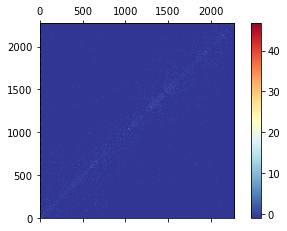

In [31]:
printMatrix(labels_score['chr1'], '', 1, 1, title='')

31.5660281516
(300, 300)
Limit: 31.5660281516


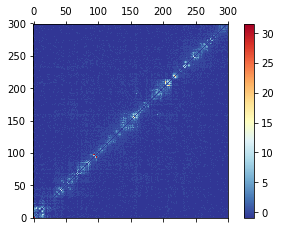

In [32]:
subset=labels_score['chr1'][[i for i in range(300)]][:, [i for i in range(300)]]
printMatrix(subset, '', 1, i, title='')

1.0
(300, 300)
Limit: 1.0


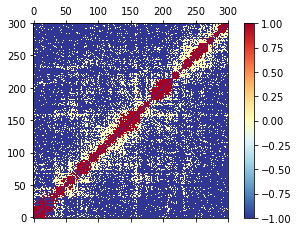

In [33]:
subset=labels_score['chr1'][[i for i in range(300)]][:, [i for i in range(300)]]
printMatrix(binarize(subset), '', 1, i, title='')

1.0
(300, 300)
Limit: 1.0


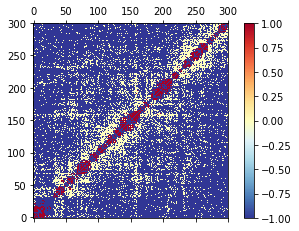

In [34]:
subset=labels_score['chr1'][[i for i in range(300)]][:, [i for i in range(300)]]
printMatrix(binarize_w_unlabeled(subset, 1), '', 1, i, title='')

1.0
(300, 300)
Limit: 1.0


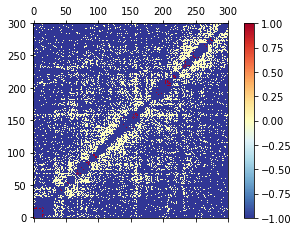

In [35]:
subset=labels_score['chr1'][[i for i in range(300)]][:, [i for i in range(300)]]
printMatrix(binarize_w_unlabeled(subset, 5), '', 1, i, title='')

Average value with zeros:  21.9245984551
Average q-value w/o zeros:  33.3418257631


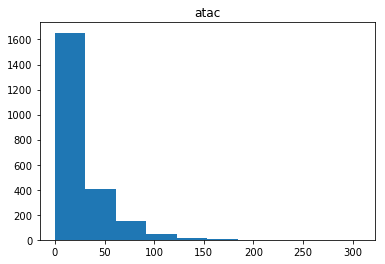

Average value with zeros:  30.8321433979
Average q-value w/o zeros:  63.798387796


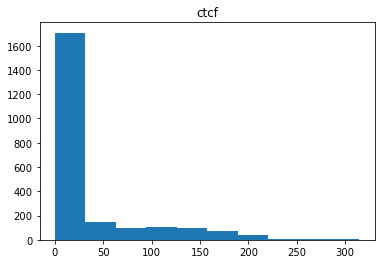

Average value with zeros:  18.2601188732
Average q-value w/o zeros:  35.2780527891


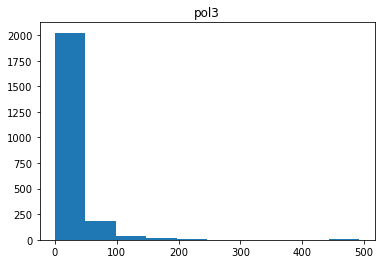

Average value with zeros:  6.97454184859
Average q-value w/o zeros:  17.6657291862


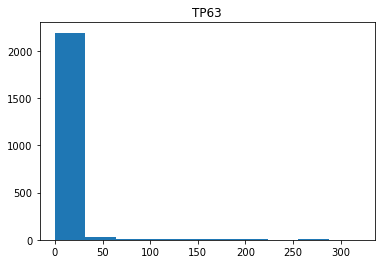

Average value with zeros:  0.828355180458
Average q-value w/o zeros:  9.04818735577


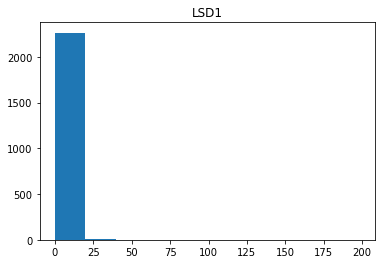

Average value with zeros:  29.1659232835
Average q-value w/o zeros:  55.7316885618


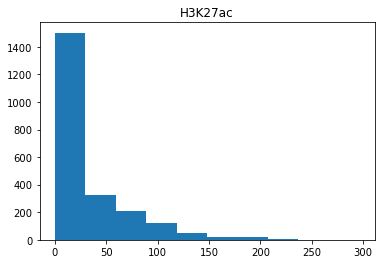

Average value with zeros:  3.3275984419
Average q-value w/o zeros:  16.0175925


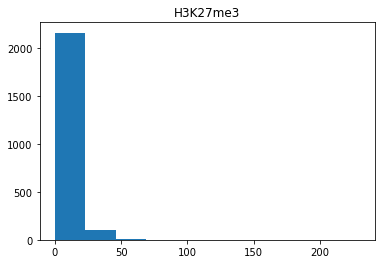

Average value with zeros:  10.5938546083
Average q-value w/o zeros:  15.7418166579


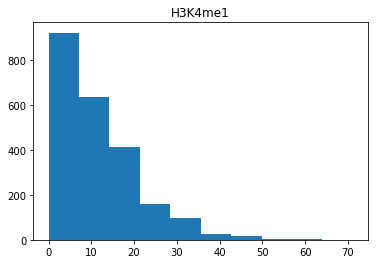

Average value with zeros:  105.891611549
Average q-value w/o zeros:  179.809971181


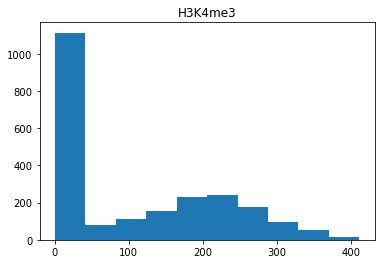

Average value with zeros:  16.4996693574
Average q-value w/o zeros:  30.6268372386


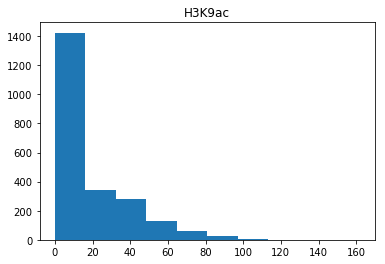

In [36]:
VectorATAC=get_features(PromoterFile, atac, 'atac')

VectorCTCF=get_features(PromoterFile, ctcf, 'ctcf')
VectorPOL3=get_features(PromoterFile, pol3, 'pol3')
VectorTP63=get_features(PromoterFile, TP63, 'TP63')
VectorLSD1=get_features(PromoterFile, LSD1, 'LSD1')

VectorH3K27ac=get_features(PromoterFile, H3K27ac, 'H3K27ac')
VectorH3K27me3=get_features(PromoterFile, H3K27me3, 'H3K27me3')
VectorH3K4me1=get_features(PromoterFile, H3K4me1, 'H3K4me1')
VectorH3K4me3=get_features(PromoterFile, H3K4me3, 'H3K4me3')
VectorH3K9ac=get_features(PromoterFile, H3K9ac, 'H3K9ac')

In [37]:
distance_for_node = build_distance_for_node(PromoterFile)

In [38]:
FeatureVector_wo_dist = {}
FeatureVector = {}
for chr in VectorATAC:
    if chr != 'chrY':
        FeatureVector_wo_dist[chr] = demean(np.vstack((VectorATAC[chr], VectorCTCF[chr], VectorPOL3[chr], VectorTP63[chr], VectorLSD1[chr], VectorH3K27ac[chr], VectorH3K27me3[chr], VectorH3K4me1[chr], VectorH3K4me3[chr], VectorH3K9ac[chr])).T)
        FeatureVector[chr] = np.concatenate((FeatureVector_wo_dist[chr], distance_for_node[chr]), axis=1)
#FeatureVectorDistance = demean(np.vstack((VectorATAC, VectorCTCF, VectorPOL3, VectorTP63, VectorLSD1, VectorH3K27ac, VectorH3K27me3, VectorH3K4me1, VectorH3K4me3, VectorH3K9ac, distance_for_node)).T)

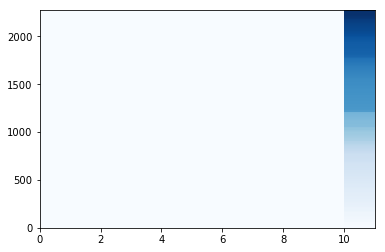

In [39]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(FeatureVector['chr1'], cmap=plt.cm.Blues)
#heatmap = ax.pcolor(DistanceFeatureVectorK, cmap=plt.cm.Blues)

## Get Motif Vector

In [40]:
pos=np.load(motifs_top3_pos)
mat=np.load(motifs_top3)

In [41]:
all_chr=['chr'+str(i+1) for i in range(22)]+['chrX']

In [42]:
FeatureAndMotifVector={}
VectorMotif={}
for chr in all_chr:
    indx = np.where(pos[:,0]==chr)
    VectorMotif[chr]=mat[indx]
    FeatureAndMotifVector[chr]=np.concatenate((FeatureVector[chr], VectorMotif[chr]), axis=1)

133859.422047
(2272, 2272)
Limit: 133859.422047


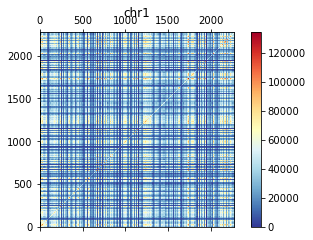

131783.136361
(1604, 1604)
Limit: 131783.136361


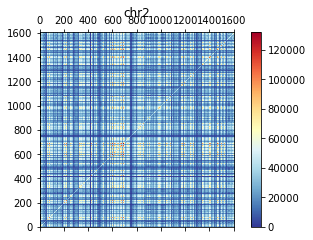

142503.806082
(1331, 1331)
Limit: 142503.806082


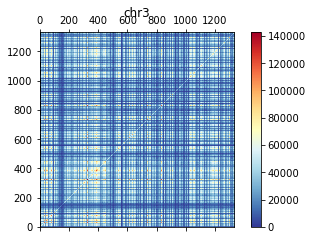

136993.489862
(947, 947)
Limit: 136993.489862


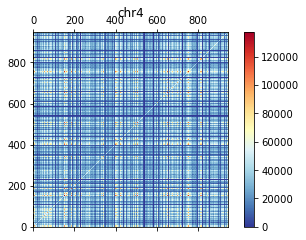

130085.507248
(1117, 1117)
Limit: 130085.507248


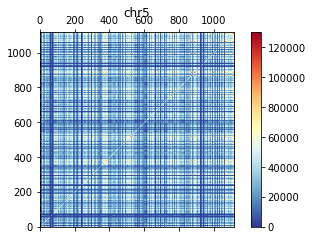

139961.257896
(1224, 1224)
Limit: 139961.257896


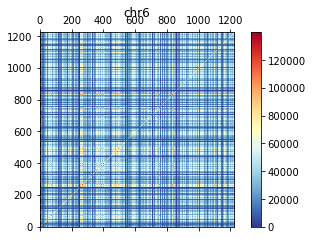

128847.42516
(1020, 1020)
Limit: 128847.42516


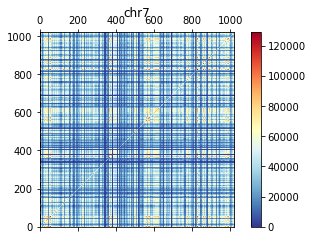

136483.470868
(897, 897)
Limit: 136483.470868


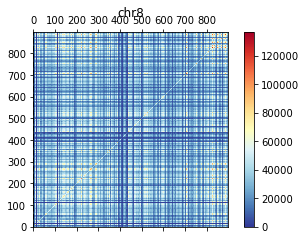

134582.533375
(859, 859)
Limit: 134582.533375


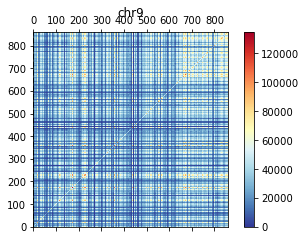

134735.252573
(943, 943)
Limit: 134735.252573


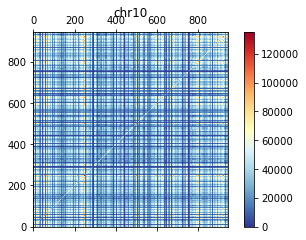

143164.886426
(1401, 1401)
Limit: 143164.886426


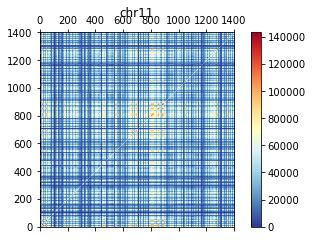

151300.423248
(1200, 1200)
Limit: 151300.423248


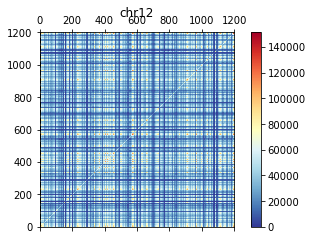

127117.551309
(452, 452)
Limit: 127117.551309


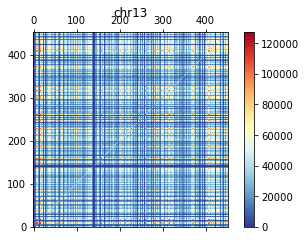

132531.862746
(779, 779)
Limit: 132531.862746


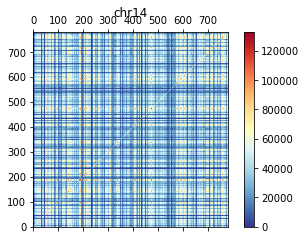

139406.145694
(629, 629)
Limit: 139406.145694


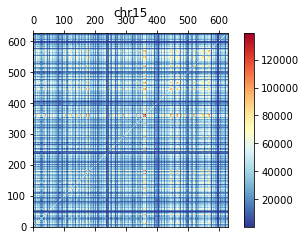

128096.108239
(726, 726)
Limit: 128096.108239


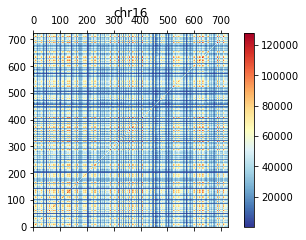

139311.158365
(1057, 1057)
Limit: 139311.158365


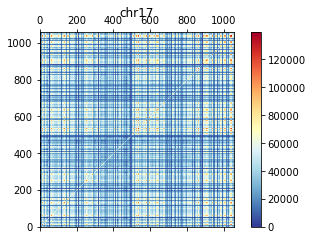

118651.771339
(352, 352)
Limit: 118651.771339


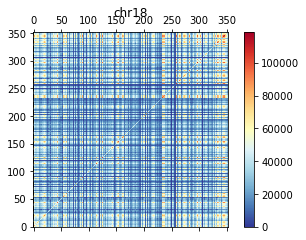

142338.827007
(1052, 1052)
Limit: 142338.827007


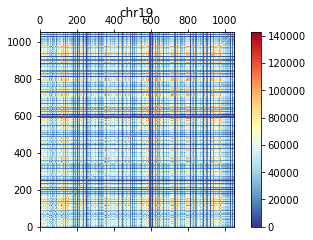

139308.192748
(619, 619)
Limit: 139308.192748


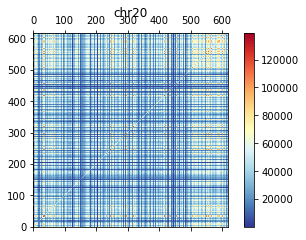

126298.458697
(280, 280)
Limit: 126298.458697


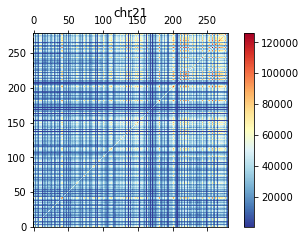

133448.823815
(431, 431)
Limit: 133448.823815


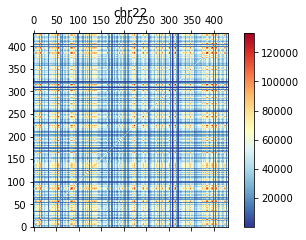

134924.323098
(861, 861)
Limit: 134924.323098


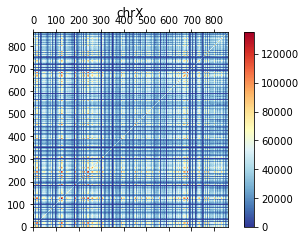

In [43]:
for chr in all_chr:
    map=np.dot(VectorMotif[chr], VectorMotif[chr].T)
    printMatrix(map, '', 1, 1, title=chr)

## use features and motifs...

In [ ]:
#data, labels, indx  = get_data_labels(FeatureVector, labels_score)

In [ ]:
data, labels, indx  = get_data_labels(FeatureAndMotifVector, labels_score)

In [ ]:
data_all_chrs, labels_all_chrs, indx_all_chr = concatenate_chrs(data, labels, indx)

In [ ]:
#data_all_chrs_gt10kb_lt2Mb, labels_all_chrs_gt10kb_lt2Mb, indx_all_chrs_gt10kb_lt2Mb = impose_dist_constrains(data_all_chrs, labels_all_chrs, indx_all_chr, 10000, 2000000)

In [ ]:
#data_all_chrs_gt10kb_lt2Mb.shape

In [ ]:
#all_at_0 = binarize_w_unlabeled(labels_all_chrs_gt10kb_lt2Mb, 0)
#all_at_5 = binarize_w_unlabeled(labels_all_chrs_gt10kb_lt2Mb, 5)
#all_at_10 = binarize_w_unlabeled(labels_all_chrs_gt10kb_lt2Mb, 10)

In [ ]:
# data_all_wo_unlbd_at_0, labels_all_wo_unlbd_at_0 = remove_unlabeled(data_all_chrs_gt10kb_lt2Mb, binarize_w_unlabeled(labels_all_chrs_gt10kb_lt2Mb, 0))
# data_all_wo_unlbd_at_3, labels_all_wo_unlbd_at_3 = remove_unlabeled(data_all_chrs_gt10kb_lt2Mb, binarize_w_unlabeled(labels_all_chrs_gt10kb_lt2Mb, 3))
# data_all_wo_unlbd_at_5, labels_all_wo_unlbd_at_5 = remove_unlabeled(data_all_chrs_gt10kb_lt2Mb, binarize_w_unlabeled(labels_all_chrs_gt10kb_lt2Mb, 5))

In [ ]:
# data_all_wo_unlbd_at_0, labels_all_wo_unlbd_at_0, indx_all_wo_unlbd_at_0 = remove_unlabeled(data_all_chrs, binarize_w_unlabeled(labels_all_chrs, 0), indx_all_chr)
# data_all_wo_unlbd_at_3, labels_all_wo_unlbd_at_3, indx_all_wo_unlbd_at_3 = remove_unlabeled(data_all_chrs, binarize_w_unlabeled(labels_all_chrs, 3), indx_all_chr)
# data_all_wo_unlbd_at_5, labels_all_wo_unlbd_at_5, indx_all_wo_unlbd_at_5 = remove_unlabeled(data_all_chrs, binarize_w_unlabeled(labels_all_chrs, 5), indx_all_chr)
# data_all_wo_unlbd_at_7, labels_all_wo_unlbd_at_7, indx_all_wo_unlbd_at_7 = remove_unlabeled(data_all_chrs, binarize_w_unlabeled(labels_all_chrs, 7), indx_all_chr)
data_all_wo_unlbd_at_10, labels_all_wo_unlbd_at_10, indx_all_wo_unlbd_at_10 = remove_unlabeled(data_all_chrs, binarize_w_unlabeled(labels_all_chrs, 10), indx_all_chr)

In [ ]:
#train_set_thres_0, vali_set_thres_0, test_set_thres_0, labels_train_thres_0, labels_vali_thres_0, labels_test_thres_0, indx_train_thres_0, indx_vali_thres_0, indx_test_thres_0 =train_vali_test(data_all_wo_unlbd_at_0, labels_all_wo_unlbd_at_0, indx_all_wo_unlbd_at_0, 0.5, 0.3)

In [ ]:
#train_set_thres_3, vali_set_thres_3, test_set_thres_3, labels_train_thres_3, labels_vali_thres_3, labels_test_thres_3, indx_train_thres_3, indx_vali_thres_3, indx_test_thres_3 =train_vali_test(data_all_wo_unlbd_at_3, labels_all_wo_unlbd_at_3, indx_all_wo_unlbd_at_3, 0.5, 0.3)

In [ ]:
#train_set_thres_5, vali_set_thres_5, test_set_thres_5, labels_train_thres_5, labels_vali_thres_5, labels_test_thres_5, indx_train_thres_5, indx_vali_thres_5, indx_test_thres_5 =train_vali_test(data_all_wo_unlbd_at_5, labels_all_wo_unlbd_at_5, indx_all_wo_unlbd_at_5, 0.5, 0.3)

In [ ]:
#train_set_thres_7, vali_set_thres_7, test_set_thres_7, labels_train_thres_7, labels_vali_thres_7, labels_test_thres_7, indx_train_thres_7, indx_vali_thres_7, indx_test_thres_7 =train_vali_test(data_all_wo_unlbd_at_7, labels_all_wo_unlbd_at_7, indx_all_wo_unlbd_at_7, 0.5, 0.3)

In [ ]:
train_set_thres_10, vali_set_thres_10, test_set_thres_10, labels_train_thres_10, labels_vali_thres_10, labels_test_thres_10, indx_train_thres_10, indx_vali_thres_10, indx_test_thres_10 =train_vali_test(data_all_wo_unlbd_at_10, labels_all_wo_unlbd_at_10, indx_all_wo_unlbd_at_10, 0.5, 0.3)

In [ ]:
# min_dist=10000
# max_dist=2000000
# dist_step=10000
# class_imbalance=1
# X_test_distance_matched_at_0, y_test_distance_matched_at_0, indx_test_distance_matched_at_0  = get_pairs_distance_matched(test_set_thres_0, labels_test_thres_0, indx_test_thres_0, min_dist, max_dist, dist_step, class_imbalance)
# X_train_distance_matched_at_0, y_train_distance_matched_at_0, indx_train_distance_matched_at_0 = get_pairs_distance_matched(train_set_thres_0, labels_train_thres_0, indx_train_thres_0, min_dist, max_dist, dist_step, class_imbalance)
# X_valid_distance_matched_at_0, y_valid_distance_matched_at_0, indx_valid_distance_matched_at_0  = get_pairs_distance_matched(vali_set_thres_0, labels_vali_thres_0, indx_vali_thres_0, min_dist, max_dist, dist_step, class_imbalance)

In [ ]:
# min_dist=10000
# max_dist=2000000
# dist_step=10000
# class_imbalance=1
# X_test_distance_matched_at_3, y_test_distance_matched_at_3, indx_test_distance_matched_at_3 = get_pairs_distance_matched(test_set_thres_3, labels_test_thres_3, indx_test_thres_3, min_dist, max_dist, dist_step, class_imbalance)
# X_train_distance_matched_at_3, y_train_distance_matched_at_3, indx_train_distance_matched_at_3 = get_pairs_distance_matched(train_set_thres_3, labels_train_thres_3, indx_train_thres_3, min_dist, max_dist, dist_step, class_imbalance)
# X_valid_distance_matched_at_3, y_valid_distance_matched_at_3, indx_valid_distance_matched_at_3 = get_pairs_distance_matched(vali_set_thres_3, labels_vali_thres_3, indx_vali_thres_3, min_dist, max_dist, dist_step, class_imbalance)

In [ ]:
# min_dist=10000
# max_dist=2000000
# dist_step=10000
# class_imbalance=1
# X_test_distance_matched_at_5, y_test_distance_matched_at_5, indx_test_distance_matched_at_5 = get_pairs_distance_matched(test_set_thres_5, labels_test_thres_5, indx_test_thres_5, min_dist, max_dist, dist_step, class_imbalance)
# X_train_distance_matched_at_5, y_train_distance_matched_at_5, indx_train_distance_matched_at_5 = get_pairs_distance_matched(train_set_thres_5, labels_train_thres_5, indx_train_thres_5, min_dist, max_dist, dist_step, class_imbalance)
# X_valid_distance_matched_at_5, y_valid_distance_matched_at_5, indx_valid_distance_matched_at_5 = get_pairs_distance_matched(vali_set_thres_5, labels_vali_thres_5, indx_vali_thres_5, min_dist, max_dist, dist_step, class_imbalance)

In [ ]:
# min_dist=10000
# max_dist=2000000
# dist_step=10000
# class_imbalance=1
# X_test_distance_matched_at_7, y_test_distance_matched_at_7, indx_test_distance_matched_at_7 = get_pairs_distance_matched(test_set_thres_7, labels_test_thres_7, indx_test_thres_7, min_dist, max_dist, dist_step, class_imbalance)
# X_train_distance_matched_at_7, y_train_distance_matched_at_7, indx_train_distance_matched_at_7 = get_pairs_distance_matched(train_set_thres_7, labels_train_thres_7, indx_train_thres_7, min_dist, max_dist, dist_step, class_imbalance)
# X_valid_distance_matched_at_7, y_valid_distance_matched_at_7, indx_valid_distance_matched_at_7 = get_pairs_distance_matched(vali_set_thres_7, labels_vali_thres_7, indx_vali_thres_7, min_dist, max_dist, dist_step, class_imbalance)

In [ ]:
min_dist=10000
max_dist=2000000
dist_step=10000
class_imbalance=1
X_test_distance_matched_at_10, y_test_distance_matched_at_10, indx_test_distance_matched_at_10 = get_pairs_distance_matched(test_set_thres_10, labels_test_thres_10, indx_test_thres_10, min_dist, max_dist, dist_step, class_imbalance)
X_train_distance_matched_at_10, y_train_distance_matched_at_10, indx_train_distance_matched_at_10 = get_pairs_distance_matched(train_set_thres_10, labels_train_thres_10, indx_train_thres_10, min_dist, max_dist, dist_step, class_imbalance)
X_valid_distance_matched_at_10, y_valid_distance_matched_at_10, indx_valid_distance_matched_at_10 = get_pairs_distance_matched(vali_set_thres_10, labels_vali_thres_10, indx_vali_thres_10, min_dist, max_dist, dist_step, class_imbalance)

In [ ]:
# print "in all chrs:"
# y_at_0=np.concatenate((y_train_distance_matched_at_0, y_valid_distance_matched_at_0, y_test_distance_matched_at_0), axis=0)
# print "pos at thres=0: ", np.where(y_at_0 > 0)[0].shape[0]
# print "neg at thres=0: ", np.where(y_at_0 == 0)[0].shape[0]
# print "total: ", y_at_0.shape[0]

In [ ]:
# print "in all chrs:"
# y_at_3=np.concatenate((y_train_distance_matched_at_3, y_valid_distance_matched_at_3, y_test_distance_matched_at_3), axis=0)
# print "pos at thres=0: ", np.where(y_at_3 > 0)[0].shape[0]
# print "neg at thres=0: ", np.where(y_at_3 == 0)[0].shape[0]
# print "total: ", y_at_3.shape[0]

In [ ]:
# print "in all chrs:"
# y_at_5=np.concatenate((y_train_distance_matched_at_5, y_valid_distance_matched_at_5, y_test_distance_matched_at_5), axis=0)
# print "pos at thres=0: ", np.where(y_at_5 > 0)[0].shape[0]
# print "neg at thres=0: ", np.where(y_at_5 == 0)[0].shape[0]
# print "total: ", y_at_5.shape[0]

In [ ]:
# print "in all chrs:"
# y_at_7=np.concatenate((y_train_distance_matched_at_7, y_valid_distance_matched_at_10, y_test_distance_matched_at_7), axis=0)
# print "pos at thres=10: ", np.where(y_at_7 > 0)[0].shape[0], " | train: ", np.where(y_train_distance_matched_at_7 > 0)[0].shape[0], "vali:",np.where(y_valid_distance_matched_at_7 > 0)[0].shape[0], "test:",np.where(y_test_distance_matched_at_7 > 0)[0].shape[0] 
# print "neg at thres=10: ", np.where(y_at_7 == 0)[0].shape[0], " | train: ", np.where(y_train_distance_matched_at_7 == 0)[0].shape[0], "vali:",np.where(y_valid_distance_matched_at_7 == 0)[0].shape[0], "test:",np.where(y_test_distance_matched_at_7 == 0)[0].shape[0]
# print "total: ", y_at_7.shape[0]

In [ ]:
print "in all chrs:"
y_at_10=np.concatenate((y_train_distance_matched_at_10, y_valid_distance_matched_at_10, y_test_distance_matched_at_10), axis=0)
print "pos at thres=10: ", np.where(y_at_10 > 0)[0].shape[0], " | train: ", np.where(y_train_distance_matched_at_10 > 0)[0].shape[0], "vali:",np.where(y_valid_distance_matched_at_10 > 0)[0].shape[0], "test:",np.where(y_test_distance_matched_at_10 > 0)[0].shape[0] 
print "neg at thres=10: ", np.where(y_at_10 == 0)[0].shape[0], " | train: ", np.where(y_train_distance_matched_at_10 == 0)[0].shape[0], "vali:",np.where(y_valid_distance_matched_at_10 == 0)[0].shape[0], "test:",np.where(y_test_distance_matched_at_10 == 0)[0].shape[0]
print "total: ", y_at_10.shape[0]

In [ ]:
#count_nodes_and_contacts(indx_train_distance_matched_at_0, indx_valid_distance_matched_at_0, indx_test_distance_matched_at_0)

In [ ]:
#count_nodes_and_contacts(indx_train_distance_matched_at_3, indx_valid_distance_matched_at_3, indx_test_distance_matched_at_3)

In [ ]:
#count_nodes_and_contacts(indx_train_distance_matched_at_5, indx_valid_distance_matched_at_5, indx_test_distance_matched_at_5)

In [ ]:
#count_nodes_and_contacts(indx_train_distance_matched_at_7, indx_valid_distance_matched_at_7, indx_test_distance_matched_at_7)

In [ ]:
count_nodes_and_contacts(indx_train_distance_matched_at_10, indx_valid_distance_matched_at_10, indx_test_distance_matched_at_10)

In [ ]:
# np.save(DATAJDIR+'X_train_thres_10_maxij.npy', X_train_distance_matched_at_10) 
# np.save(DATAJDIR+'X_valid_thres_10_maxij.npy', X_valid_distance_matched_at_10) 
# np.save(DATAJDIR+'X_test_thres_10_maxij.npy', X_test_distance_matched_at_10) 
# np.save(DATAJDIR+'y_train_thres_10_maxij.npy', y_train_distance_matched_at_10)
# np.save(DATAJDIR+'y_valid_thres_10_maxij.npy', y_valid_distance_matched_at_10)
# np.save(DATAJDIR+'y_test_thres_10_maxij.npy', y_test_distance_matched_at_10)

In [ ]:
# np.save(DATAJDIR+'X_train_thres_0.npy', X_train_distance_matched_at_0) 
# np.save(DATAJDIR+'X_valid_thres_0.npy', X_valid_distance_matched_at_0) 
# np.save(DATAJDIR+'X_test_thres_0.npy', X_test_distance_matched_at_0) 
# np.save(DATAJDIR+'y_train_thres_0.npy', y_train_distance_matched_at_0)
# np.save(DATAJDIR+'y_valid_thres_0.npy', y_valid_distance_matched_at_0)
# np.save(DATAJDIR+'y_test_thres_0.npy', y_test_distance_matched_at_0)
# np.save(DATAJDIR+'indx_train_thres_0.npy', indx_train_distance_matched_at_0)
# np.save(DATAJDIR+'indx_valid_thres_0.npy', indx_valid_distance_matched_at_0)
# np.save(DATAJDIR+'indx_test_thres_0.npy', indx_test_distance_matched_at_0)

# np.save(DATAJDIR+'X_train_thres_3.npy', X_train_distance_matched_at_3) 
# np.save(DATAJDIR+'X_valid_thres_3.npy', X_valid_distance_matched_at_3) 
# np.save(DATAJDIR+'X_test_thres_3.npy', X_test_distance_matched_at_3) 
# np.save(DATAJDIR+'y_train_thres_3.npy', y_train_distance_matched_at_3)
# np.save(DATAJDIR+'y_valid_thres_3.npy', y_valid_distance_matched_at_3)
# np.save(DATAJDIR+'y_test_thres_3.npy', y_test_distance_matched_at_3)
# np.save(DATAJDIR+'indx_train_thres_3.npy', indx_train_distance_matched_at_3)
# np.save(DATAJDIR+'indx_valid_thres_3.npy', indx_valid_distance_matched_at_3)
# np.save(DATAJDIR+'indx_test_thres_3.npy', indx_test_distance_matched_at_3)

# np.save(DATAJDIR+'X_train_thres_5.npy', X_train_distance_matched_at_5) 
# np.save(DATAJDIR+'X_valid_thres_5.npy', X_valid_distance_matched_at_5) 
# np.save(DATAJDIR+'X_test_thres_5.npy', X_test_distance_matched_at_5) 
# np.save(DATAJDIR+'y_train_thres_5.npy', y_train_distance_matched_at_5)
# np.save(DATAJDIR+'y_valid_thres_5.npy', y_valid_distance_matched_at_5)
# np.save(DATAJDIR+'y_test_thres_5.npy', y_test_distance_matched_at_5)
# np.save(DATAJDIR+'indx_train_thres_5.npy', indx_train_distance_matched_at_5)
# np.save(DATAJDIR+'indx_valid_thres_5.npy', indx_valid_distance_matched_at_5)
# np.save(DATAJDIR+'indx_test_thres_5.npy', indx_test_distance_matched_at_5)

# np.save(DATAJDIR+'X_train_thres_7.npy', X_train_distance_matched_at_7) 
# np.save(DATAJDIR+'X_valid_thres_7.npy', X_valid_distance_matched_at_7) 
# np.save(DATAJDIR+'X_test_thres_7.npy', X_test_distance_matched_at_7) 
# np.save(DATAJDIR+'y_train_thres_7.npy', y_train_distance_matched_at_7)
# np.save(DATAJDIR+'y_valid_thres_7.npy', y_valid_distance_matched_at_7)
# np.save(DATAJDIR+'y_test_thres_7.npy', y_test_distance_matched_at_7)
# np.save(DATAJDIR+'indx_train_thres_7.npy', indx_train_distance_matched_at_7)
# np.save(DATAJDIR+'indx_valid_thres_7.npy', indx_valid_distance_matched_at_7)
# np.save(DATAJDIR+'indx_test_thres_7.npy', indx_test_distance_matched_at_7)


np.save(DATAJDIR+'X_train_thres_10_w_motifs.npy', X_train_distance_matched_at_10) 
np.save(DATAJDIR+'X_valid_thres_10_w_motifs.npy', X_valid_distance_matched_at_10) 
np.save(DATAJDIR+'X_test_thres_10_w_motifs.npy', X_test_distance_matched_at_10) 
np.save(DATAJDIR+'y_train_thres_10_w_motifs.npy', y_train_distance_matched_at_10)
np.save(DATAJDIR+'y_valid_thres_10_w_motifs.npy', y_valid_distance_matched_at_10)
np.save(DATAJDIR+'y_test_thres_10_w_motifs.npy', y_test_distance_matched_at_10)
np.save(DATAJDIR+'indx_train_thres_10_w_motifs.npy', indx_train_distance_matched_at_10)
np.save(DATAJDIR+'indx_valid_thres_10_w_motifs.npy', indx_valid_distance_matched_at_10)
np.save(DATAJDIR+'indx_test_thres_10_w_motifs.npy', indx_test_distance_matched_at_10)
# #d = np.load('labels_test_all.npy')